## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [26]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2023-01-18 23:06:55--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... non riuscito: Errore temporaneo nella risoluzione del nome.
wget: impossibile risolvere l'indirizzo dell'host "www.dropbox.com"


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [23]:
import pandas as pd
import numpy as np

In [48]:
#1
import random

# read text file into pandas DataFrame
n=random.randint(10000, 1310720)
df = pd.read_csv("data_000637.txt", nrows=n)

# display DataFrame
df

#
#for i in range(200):
#    print(df['ORBIT_CNT'][i], '  ',df['BX_COUNTER'][i], '   ', df['TDC_MEAS'][i])
#Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, 
#and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
750667,1,0,139,3869207355,2020,0
750668,1,0,62,3869207355,2013,8
750669,1,0,63,3869207355,2013,12
750670,1,0,64,3869207355,2018,17


In [49]:
#2 SBAGLIATO

a=np.array(df.values)
x=np.ones(n)
for i in range(1,n,1):
    if a[i,3]!=a[i-1,3]:
        x[i]=x[i]*a[i-1,4]
      #  print(x[i])
        #print(a[i,3],a[i-1,4])
        #print(a)
np.delete(x, np.argmax(x))
np.delete(x, np.argmin(x))


#2 CORRETTO

orbit_unit = df['BX_COUNTER'].max()
print(orbit_unit)

3563


In [20]:
#3

max_ORBIT_CNT = df['ORBIT_CNT'].max()
print(max_ORBIT_CNT)

data_max_BX_ORBIT = df.loc[df['ORBIT_CNT'] == max_ORBIT_CNT]
print(data_max_BX_ORBIT)
max_BX_ORBIT = data_max_BX_ORBIT['BX_COUNTER'].max()
print(max_BX_ORBIT)


min_ORBIT_CNT = df['ORBIT_CNT'].min()
data_min_BX_ORBIT = df.loc[df['ORBIT_CNT'] == min_ORBIT_CNT]
min_BX_ORBIT = data_min_BX_ORBIT['BX_COUNTER'].min()

time_start = (min_ORBIT_CNT * orbit_unit + min_BX_ORBIT)
time_end = (max_ORBIT_CNT * orbit_unit + max_BX_ORBIT)

time_tot = time_end - time_start
time_tot_second = time_tot * 25 *1e-9  #25 ns * (number of Bx_counter units)

print('total time:',time_tot, 'ns')

3869202361
        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
220354     1     0           59  3869202361          99        27
220355     1     0           62  3869202361          94        10
220356     1     0           60  3869202361         104        22
220357     1     0           61  3869202361         142        12
220358     1     1            1  3869202361         146         8
...      ...   ...          ...         ...         ...       ...
220420     1     0           54  3869202361        2488        10
220421     1     1           60  3869202361        2495        11
220422     1     0           56  3869202361        2498         3
220423     1     0           75  3869202361        2538        10
220424     1     0           79  3869202361        2542        27

[71 rows x 6 columns]
2542
total time: 7817390 ns


In [164]:
# 4

abs_time=(df['ORBIT_CNT']*orbit_unit+df['BX_COUNTER'])*25 + df['TDC_MEAS']*25/30 #in [ns]
df['abs_time']=abs_time
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,0,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,0,0,63,3869200167,2553,28,3.446490e+14
3,0,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
750667,1,0,139,3869207355,2020,0,3.446496e+14
750668,1,0,62,3869207355,2013,8,3.446496e+14
750669,1,0,63,3869207355,2013,12,3.446496e+14
750670,1,0,64,3869207355,2018,17,3.446496e+14


In [53]:
#5
for i in range(110195):
    df['HEAD'][i]=np.random.randint(0,2)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,0,0,123,3869200167,2374,26,344649004934875
1,1,0,124,3869200167,2374,27,344649004934875
2,0,0,63,3869200167,2553,28,344649004939350
3,0,0,64,3869200167,2558,19,344649004939475
4,1,0,64,3869200167,2760,25,344649004944525
...,...,...,...,...,...,...,...
750667,1,0,139,3869207355,2020,0,344649645197125
750668,1,0,62,3869207355,2013,8,344649645196950
750669,1,0,63,3869207355,2013,12,344649645196950
750670,1,0,64,3869207355,2018,17,344649645197075


In [57]:
#6 errato
#define a void dataframe
df_new = df

#for i in range(110195):
 #   if df_new['HEAD'][i]==1:
 #       df_new = df_new.drop([i])
#df_new

In [62]:
#6
df_new = df.loc[df['HEAD'] == 1]
df_new

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
1,1,0,124,3869200167,2374,27,344649004934875
4,1,0,64,3869200167,2760,25,344649004944525
5,1,0,63,3869200167,2762,4,344649004944575
7,1,0,139,3869200167,2776,0,344649004944925
8,1,0,62,3869200167,2774,21,344649004944875
...,...,...,...,...,...,...,...
750667,1,0,139,3869207355,2020,0,344649645197125
750668,1,0,62,3869207355,2013,8,344649645196950
750669,1,0,63,3869207355,2013,12,344649645196950
750670,1,0,64,3869207355,2018,17,344649645197075


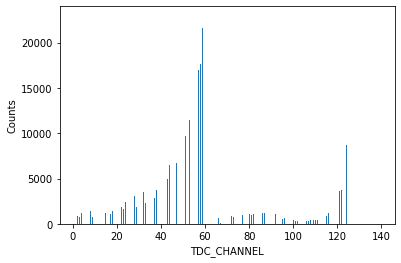

In [72]:
#7 
#plot the number of counts per TDC channel, for each fpga
import matplotlib.pyplot as plt
df_1 = df_new.loc[df['FPGA'] == 0]
df_2 = df_new.loc[df['FPGA'] == 1]

plt.hist(df_1['TDC_CHANNEL'],bins=int(np.sqrt(df_1['TDC_CHANNEL'].shape[0])))
plt.xlabel("TDC_CHANNEL")
plt.ylabel("Counts")
plt.ylim([0, 24000])
plt.show()

In [125]:
#8
df_1
df_1.groupby(['TDC_CHANNEL']).count()['HEAD'].nlargest(3)

TDC_CHANNEL
139    40357
64     34076
63     33755
Name: HEAD, dtype: int64

In [163]:
#9
#Count the number of unique orbits
print('number of unique orbits:', df.nunique()['ORBIT_CNT'])

#Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
df_139 = df.loc[df['TDC_CHANNEL'] == 139]
print('number of unique orbits with at least one measurement from TDC_CHANNEL=139:', df_139.nunique()['ORBIT_CNT'])

number of unique orbits: 7185
number of unique orbits with at least one measurement from TDC_CHANNEL=139: 7160
